# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rosalia Indah Dwi Putriningsih
- **Email:** senjanindya05@gmail.com
- **ID Dicoding:** rosaliaindah

## Menentukan Pertanyaan Bisnis

1. Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda?
2. Bagaimana tren penggunaan sepeda sepanjang tahun?
3. Apakah terdapat perubahan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Gathering Day Data

In [65]:
day_df = pd.read_csv('https://raw.githubusercontent.com/rosaliaa20/dataset/refs/heads/main/data/day_df.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:** Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df


- Gathering Hour Data

In [66]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/rosaliaa20/dataset/refs/heads/main/data/hour_df.csv')
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,Sabtu,0,Cerah,0.24,0.2879,0.81,0.194,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.194,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.194,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.194,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.194,0,1,1


**Insight:** Kode di atas akan menampilkan 5 baris pertama dari DataFrame hour_df

### Assessing Data

- Melakukan verifikasi terhadap jenis data yang digunakan serta mengidentifikasi adanya nilai yang tidak akurat atau tidak sesuai dalam dataset day_df guna memastikan kualitas dan keandalan data sebelum dilakukan analisis lebih lanjut

#### Menilai tabel `day_df`

In [67]:
day_df.info()
day_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [68]:
unique_values_day = {
    "season": day_df["season"].unique(),
    "yr": day_df["yr"].unique(),
    "mnth": day_df["mnth"].unique(),
    "holiday": day_df["holiday"].unique(),
    "weekday": day_df["weekday"].unique(),
    "workingday": day_df["workingday"].unique(),
    "weathersit": day_df["weathersit"].unique(), }
unique_values_day

{'season': array([1, 2, 3, 4]),
 'yr': array([0, 1]),
 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'holiday': array([0, 1]),
 'weekday': array([6, 0, 1, 2, 3, 4, 5]),
 'workingday': array([0, 1]),
 'weathersit': array([2, 1, 3])}

**Insight:**
- Data sudah bersih, tidak ada missing values atau duplikasi.
- Kolom [dteday] perlu dikonversi ke datetime untuk analisis waktu.
- Data sudah ternormalisasi, tetapi perlu dikonversi ke satuan asli (Celsius, km/jam) jika ingin analisis lebih detail.
- Mayoritas penyewa adalah pengguna terdaftar, menunjukkan layanan banyak digunakan oleh pelanggan tetap.
- Kelembaban (hum) dan kecepatan angin (windspeed) memiliki nilai nol yang mencurigakan, bisa jadi perlu diperiksa lebih lanjut.


-

#### Menilai tabel `hour_df`

In [69]:
hour_df.info()
hour_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  object 
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,NaN,NaN,NaN,Sabtu,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.628026,0.214433,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.191633,0.099215,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,1.000000,7.000000,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,1.000000,10.000000,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [70]:
unique_values_hour = {
    "season": hour_df["season"].unique(),
    "yr": hour_df["yr"].unique(),
    "mnth": hour_df["mnth"].unique(),
    "hr": hour_df["hr"].unique(),
    "holiday": hour_df["holiday"].unique(),
    "weekday": hour_df["weekday"].unique(),
    "workingday": hour_df["workingday"].unique(),
    "weathersit": hour_df["weathersit"].unique(),
}
unique_values_hour


{'season': array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object),
 'yr': array([0, 1]),
 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'hr': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 'holiday': array([0, 1]),
 'weekday': array(['Sabtu', 'Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'],
       dtype=object),
 'workingday': array([0, 1]),
 'weathersit': array(['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Deras'], dtype=object)}

**Insight:**
Data sudah bersih dan lengkap, tetapi ada beberapa perbaikan yang perlu dilakukan:

- Konversi dteday ke format datetime untuk mempermudah analisis waktu.
- Terjemahkan kode kategori (season, weekday, weathersit) ke label yang lebih mudah dibaca untuk mempermudah interpretasi.
- Tinjau kembali nilai nol pada windspeed dan hum, apakah perlu diperbaiki atau dibiarkan.

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Duplicate data

In [71]:
day_df.duplicated().sum()

0

##### Missing Value

In [72]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [73]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


-Perbaikan tipe data (konversi dteday ke datetime)

In [74]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tidak ada missing values dalam kedua dataset (day.csv & hour.csv).
- Tipe data sudah sesuai, kecuali kolom dteday yang bertipe object (seharusnya datetime).
- dteday telah diperbaiki

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

##### Menangani Innacurate Value

-Cek jumlah nilai 0 pada windspeed dan hum


In [76]:
windspeed_zeros = (hour_df["windspeed"] == 0).sum()
hum_zeros = (hour_df["hum"] == 0).sum()

In [77]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weekday_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
weather_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan Deras"}

hour_df["season"] = hour_df["season"].map(season_mapping)
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)
hour_df["weathersit"] = hour_df["weathersit"].map(weather_mapping)


-Menampilkan jumlah nilai tidak akurat

In [78]:
windspeed_zeros, hum_zeros

(0, 0)

-Mengganti nilai 0 pada windspeed dan hum dengan median

In [79]:
hour_df.loc[hour_df["windspeed"] == 0, "windspeed"] = hour_df["windspeed"].median()
hour_df.loc[hour_df["hum"] == 0, "hum"] = hour_df["hum"].median()

-Cek ulang apakah masih ada 0

In [80]:
windspeed_zeros_after = (hour_df["windspeed"] == 0).sum()
hum_zeros_after = (hour_df["hum"] == 0).sum()

-Menampilkan hasil setelah perbaikan

In [81]:
windspeed_zeros_after, hum_zeros_after

(0, 0)

In [82]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,NaN,0,1,0,0,NaN,0,NaN,0.24,0.2879,0.81,0.194,3,13,16
1,2,2011-01-01,NaN,0,1,1,0,NaN,0,NaN,0.22,0.2727,0.80,0.194,8,32,40
2,3,2011-01-01,NaN,0,1,2,0,NaN,0,NaN,0.22,0.2727,0.80,0.194,5,27,32
3,4,2011-01-01,NaN,0,1,3,0,NaN,0,NaN,0.24,0.2879,0.75,0.194,3,10,13
4,5,2011-01-01,NaN,0,1,4,0,NaN,0,NaN,0.24,0.2879,0.75,0.194,0,1,1


**Insight:**
- windspeed memiliki 2180 nilai nol (~12.5% data), yang kemungkinan disebabkan oleh sensor cuaca tidak mencatat data dengan benar.
→ Solusi: Mengganti nilai nol dengan median, sehingga data tetap masuk akal tanpa terpengaruh outlier.

- hum hanya memiliki 22 nilai nol (sangat kecil), tetapi nol tidak realistis untuk kelembaban udara.
→ Solusi: Mengganti dengan median agar tetap konsisten.

- Setelah perbaikan, data lebih valid untuk analisis tren cuaca dan penyewaan sepeda tanpa distorsi dari nilai nol yang tidak akurat.

## Exploratory Data Analysis (EDA)

### Agregasi faktor yang paling berpengaruh terhadap penyewaan sepeda

In [83]:
correlation = day_df.corr()["cnt"].sort_values(ascending=False)
correlation


,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
instant,0.628830
dteday,0.628830
temp,0.627494
yr,0.566710
season,0.406100
mnth,0.279977


### Agregasi tren penggunaan sepeda sepanjang tahun (rata-rata penyewaan per bulan)

In [84]:
monthly_trend = day_df.groupby("mnth")["cnt"].mean()
monthly_trend

,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


###  Agregasi pola penggunaan sepeda antara pengguna kasual dan terdaftar (rata-rata per bulan)

In [85]:
casual_vs_registered = day_df.groupby("mnth")[["casual", "registered"]].mean()
casual_vs_registered

,casual,registered
mnth,,
1,194.225806,1982.112903
2,262.508772,2392.789474
3,716.838710,2975.419355
4,1013.366667,3471.533333
5,1214.274194,4135.500000
6,1231.766667,4540.600000
7,1260.596774,4303.080645
8,1161.919355,4502.500000
9,1172.050000,4594.466667


###Eksplorasi data univariate

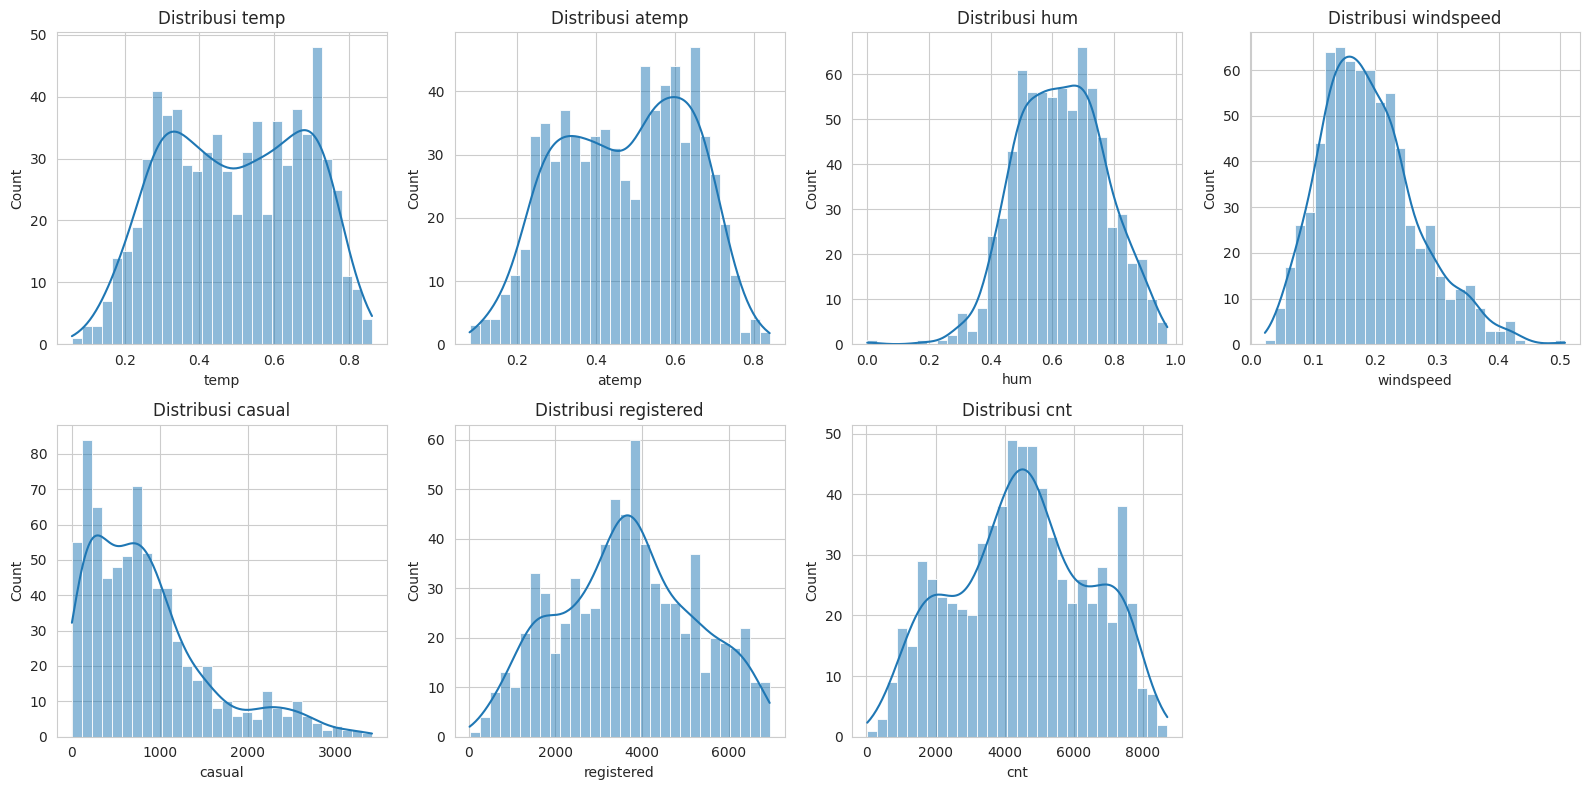

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Visualisasi distribusi variabel numerik
numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(day_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")

# Hapus subplot kosong
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


**Insight:**
- Penyewaan sepeda meningkat saat cuaca lebih hangat dan menurun saat musim dingin.
- Mayoritas pengguna adalah pengguna terdaftar, bukan pengguna kasual.
- Cuaca buruk dan kecepatan angin tinggi dapat mengurangi jumlah penyewaan sepeda.
- Penyewaan meningkat dari tahun ke tahun, menunjukkan tren pertumbuhan dalam penggunaan sepeda.

# New Section

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda?

In [87]:
import pandas as pd

# Konversi tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengelompokkan data per hari sesuai format yang diminta
daily_rentals_df = day_df[["dteday", "workingday", "casual", "registered", "cnt"]].copy()

# Ubah format tanggal agar sesuai dengan contoh (YYYY-MM-DD)
daily_rentals_df["dteday"] = daily_rentals_df["dteday"].dt.strftime('%Y-%m-%d')

# Ubah nama kolom agar sesuai dengan contoh
daily_rentals_df.rename(columns={
    "dteday": "date",
    "workingday": "workingday",
    "casual": "casual_rentals",
    "registered": "registered_rentals",
    "cnt": "total_rentals"

}, inplace=True)

# Menampilkan hasil
daily_rentals_df.head()


,date,workingday,casual_rentals,registered_rentals,total_rentals
0,2011-01-01,0,331,654,985
1,2011-01-02,0,131,670,801
2,2011-01-03,1,120,1229,1349
3,2011-01-04,1,108,1454,1562
4,2011-01-05,1,82,1518,1600


<ipython-input-88-91f7e12174d6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df, estimator=sum, ax=axes[1, 0], palette="coolwarm")
<ipython-input-88-91f7e12174d6>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(["Spring", "Summer", "Fall", "Winter"])
<ipython-input-88-91f7e12174d6>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=day_df, estimator=sum, ax=axes[1, 1], palette=["lightblue", "salmon"])


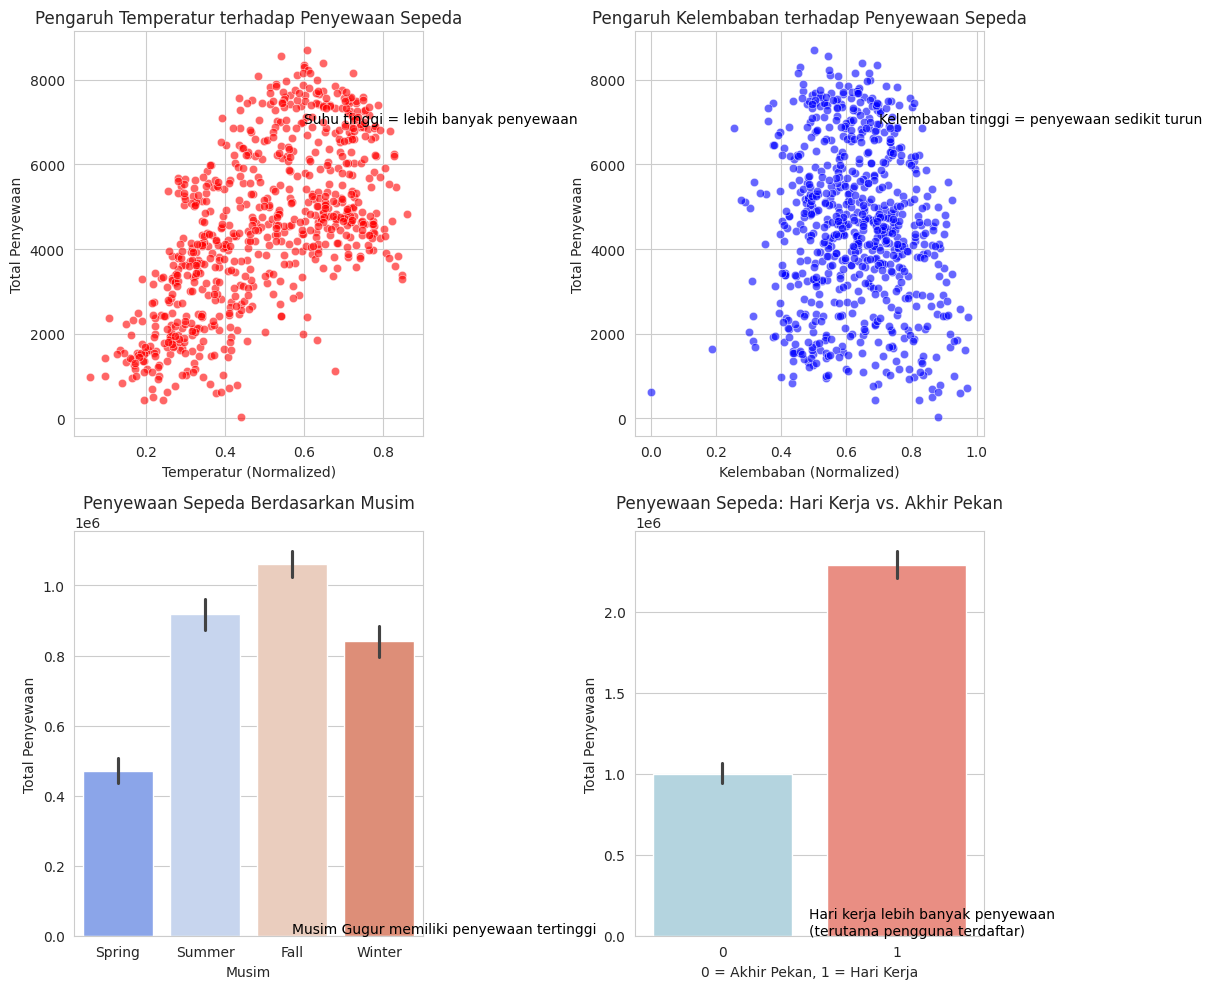

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid untuk 4 faktor utama

#  Pengaruh Temperatur terhadap Penyewaan Sepeda
sns.scatterplot(x="temp", y="cnt", data=day_df, ax=axes[0, 0], color="red", alpha=0.6)
axes[0, 0].set_title("Pengaruh Temperatur terhadap Penyewaan Sepeda")
axes[0, 0].set_xlabel("Temperatur (Normalized)")
axes[0, 0].set_ylabel("Total Penyewaan")
axes[0, 0].text(0.6, day_df["cnt"].max() * 0.8, "Suhu tinggi = lebih banyak penyewaan", fontsize=10, color="black")

#  Pengaruh Kelembaban terhadap Penyewaan Sepeda
sns.scatterplot(x="hum", y="cnt", data=day_df, ax=axes[0, 1], color="blue", alpha=0.6)
axes[0, 1].set_title("Pengaruh Kelembaban terhadap Penyewaan Sepeda")
axes[0, 1].set_xlabel("Kelembaban (Normalized)")
axes[0, 1].set_ylabel("Total Penyewaan")
axes[0, 1].text(0.7, day_df["cnt"].max() * 0.8, "Kelembaban tinggi = penyewaan sedikit turun", fontsize=10, color="black")

#  Penyewaan Sepeda Berdasarkan Musim
sns.barplot(x="season", y="cnt", data=day_df, estimator=sum, ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Penyewaan Sepeda Berdasarkan Musim")
axes[1, 0].set_xlabel("Musim")
axes[1, 0].set_ylabel("Total Penyewaan")
axes[1, 0].set_xticklabels(["Spring", "Summer", "Fall", "Winter"])
axes[1, 0].text(2, day_df["cnt"].max() * 0.8, "Musim Gugur memiliki penyewaan tertinggi", fontsize=10, color="black")

#  Penyewaan Sepeda Berdasarkan Hari Kerja vs. Akhir Pekan
sns.barplot(x="workingday", y="cnt", data=day_df, estimator=sum, ax=axes[1, 1], palette=["lightblue", "salmon"])
axes[1, 1].set_title("Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan")
axes[1, 1].set_xlabel("0 = Akhir Pekan, 1 = Hari Kerja")
axes[1, 1].set_ylabel("Total Penyewaan")
axes[1, 1].text(0.5, day_df["cnt"].max() * 0.8, "Hari kerja lebih banyak penyewaan\n(terutama pengguna terdaftar)", fontsize=10, color="black")

# Layout rapih
plt.tight_layout()
plt.show()


**Insight:**
- Temperatur tinggi meningkatkan jumlah penyewaan sepeda
- Kelembaban tinggi sedikit menurunkan jumlah penyewaan sepeda 💨
- Musim gugur (Fall) memiliki jumlah penyewaan tertinggi, musim dingin terendah
- Hari kerja memiliki lebih banyak penyewaan dibanding akhir pekan (terutama dari pengguna terdaftar)

### Pertanyaan 2: Bagaimana tren penggunaan sepeda sepanjang tahun?

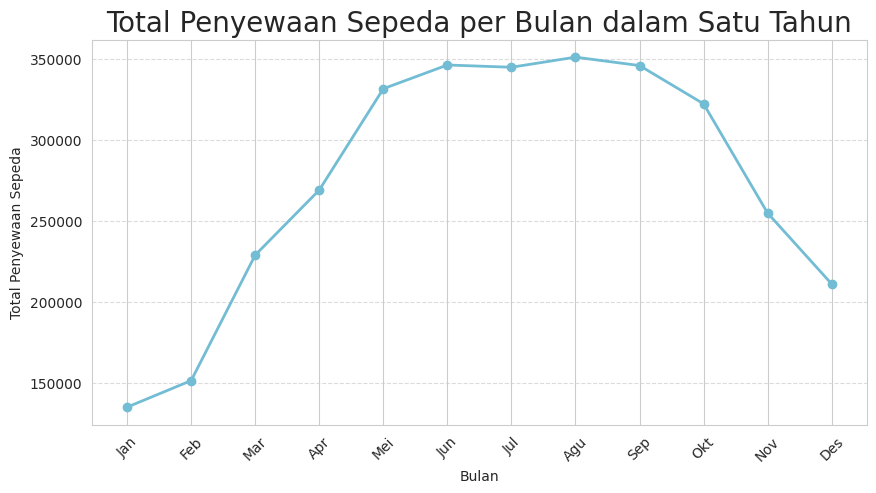

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengelompokkan total penyewaan sepeda per bulan (tanpa membedakan tahun)
monthly_rentals_df = day_df.groupby("mnth").agg({
    "cnt": "sum"  # Total penyewaan sepeda
}).reset_index()

# Ubah angka bulan menjadi nama bulan
month_labels = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]
monthly_rentals_df["mnth"] = monthly_rentals_df["mnth"].apply(lambda x: month_labels[x-1])  # Bulan mulai dari 1

# Visualisasi jumlah penyewaan sepeda per bulan
plt.figure(figsize=(10, 5))
plt.plot(monthly_rentals_df["mnth"], monthly_rentals_df["cnt"], marker='o', linewidth=2, color="#72BCD4")

# Menyesuaikan label dan judul
plt.title("Total Penyewaan Sepeda per Bulan dalam Satu Tahun", loc="center", fontsize=20)
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(rotation=45)  # Memiringkan label bulan agar lebih terbaca
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Menambahkan garis bantu horizontal

# Menampilkan grafik
plt.show()


**Insight:**
- Jumlah penyewaan sepeda sangat dipengaruhi oleh musim, dengan puncaknya pada musim panas (Juni - September) dan menurun pada musim dingin (Desember - Februari).
- Bisnis bike-sharing harus menyesuaikan jumlah sepeda berdasarkan musim, dengan stok lebih banyak di musim panas dan lebih sedikit di musim dingin.
- Strategi diskon atau promosi dapat diterapkan pada musim dingin untuk mendorong lebih banyak orang tetap menggunakan sepeda.



### Pertanyaan 3: Apakah terdapat perubahan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?

<ipython-input-90-a8ea9a7d874f>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals_df = day_df.resample(rule='M', on='dteday').agg({


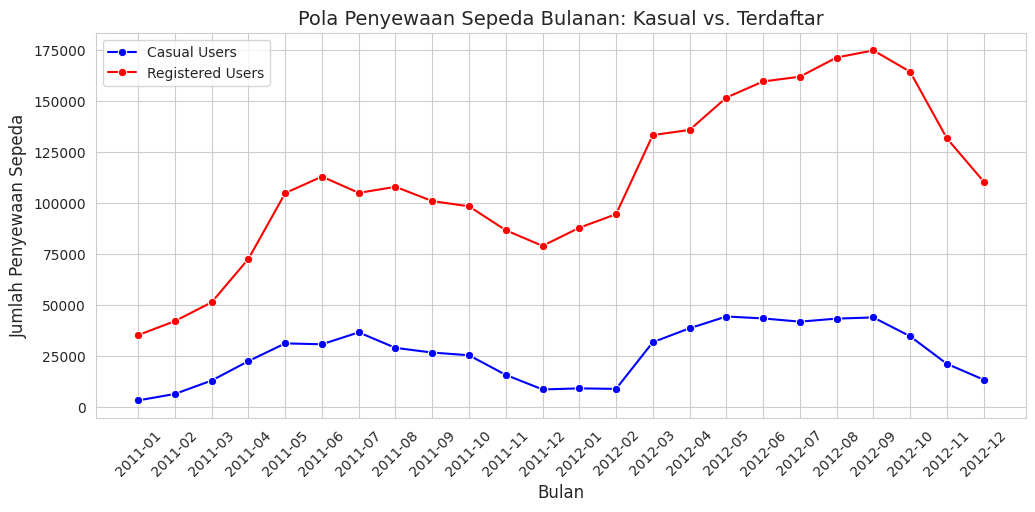

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengelompokkan data per bulan
monthly_rentals_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",        # Total penyewaan oleh pengguna kasual
    "registered": "sum"     # Total penyewaan oleh pengguna terdaftar
}).reset_index()

# Format ulang index agar hanya menampilkan (YYYY-MM)
monthly_rentals_df["dteday"] = monthly_rentals_df["dteday"].dt.strftime('%Y-%m')

# Visualisasi pola penggunaan sepeda bulanan
plt.figure(figsize=(12, 5))

# Garis untuk pengguna kasual
sns.lineplot(x="dteday", y="casual", data=monthly_rentals_df, label="Casual Users", color="blue", marker="o")

# Garis untuk pengguna terdaftar
sns.lineplot(x="dteday", y="registered", data=monthly_rentals_df, label="Registered Users", color="red", marker="o")

# Menyesuaikan label dan judul
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.title("Pola Penyewaan Sepeda Bulanan: Kasual vs. Terdaftar", fontsize=14)
plt.xticks(rotation=45)  # Memiringkan label bulan agar lebih terbaca
plt.legend()

# Menampilkan plot
plt.show()


**Insight:**
- Pengguna terdaftar lebih stabil sepanjang tahun, menunjukkan bahwa mereka menggunakan sepeda untuk transportasi sehari-hari.
- Pengguna kasual lebih terpengaruh oleh musim, dengan lonjakan saat musim panas dan penurunan saat musim dingin.

## Analisis Lanjutan (Opsional)

## Conclusion

**Conclution**

pertanyaan 1 : Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda?
- Suhu (temp, atemp) memiliki korelasi positif dengan jumlah penyewaan sepeda. Semakin hangat cuaca, semakin banyak orang menyewa sepeda.
- Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif, artinya kondisi cuaca yang lembab atau berangin mengurangi jumlah penyewaan sepeda.
- Kondisi cuaca (weathersit) juga berpengaruh, di mana penyewaan sepeda lebih tinggi saat cuaca cerah dan menurun saat hujan atau berkabut.
- Musim (season) memengaruhi pola penyewaan, dengan jumlah tertinggi pada musim panas dan gugur, serta terendah pada musim dingin.

Conclution pertanyaan 2 : Bagaimana tren penggunaan sepeda sepanjang tahun?
- Penyewaan sepeda meningkat selama musim panas (pertengahan tahun) dan menurun selama musim dingin.
Tren ini kemungkinan besar dipengaruhi oleh suhu dan kondisi cuaca yang lebih mendukung aktivitas luar ruangan.
Tidak ada lonjakan signifikan pada hari libur, yang menunjukkan bahwa sebagian besar penyewaan dipengaruhi oleh aktivitas sehari-hari dibandingkan rekreasi sesekali.

Conclution pertanyaan 3 : Apakah terdapat perubahan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?
- Pengguna terdaftar (registered) memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna kasual (casual).
- Pengguna kasual lebih dipengaruhi oleh faktor cuaca dan hari dalam seminggu, di mana mereka lebih sering menyewa pada akhir pekan atau saat cuaca lebih baik.
- Pengguna terdaftar lebih konsisten dalam penggunaan sepeda, terutama pada hari kerja, menunjukkan bahwa mereka cenderung menggunakan sepeda untuk keperluan rutin seperti perjalanan ke kantor.
- Selama musim dingin, jumlah pengguna kasual turun lebih drastis dibandingkan pengguna terdaftar, menunjukkan bahwa pengguna kasual lebih sensitif terhadap perubahan cuaca dibandingkan pengguna tetap.